In [15]:
import MDAnalysis
import matplotlib.pyplot as plt
import numpy as np
from MDAnalysis.analysis.align import *
from MDAnalysis.analysis.rms import rmsd
%matplotlib inline

In [45]:
def proRMSD(u,ref):
    """
    This function produces RMSD data and plots for Protein. 
    :input 
        1) Universe of Trajectory
        2) reference universe
    :return
        1) matplot object
        2) array for RMSD data.
        
    """
    RMSD = []
    RMSDAllAtom = []
    backbone = u.select_atoms("protein and (name C or name N or name CA)")
    reference = ref.select_atoms("protein and (name C or name N or name CA)")
    Allcurrent = u.select_atoms("protein and not name H*")
    Allreference = ref.select_atoms("protein and not name H*")
    for ts in u.trajectory:
        A = backbone.coordinates()
        B = reference.coordinates()
        E = Allcurrent.coordinates()
        F = Allreference.coordinates()
        C = rmsd(A,B)
        G = rmsd(E,F)
        RMSD.append((u.trajectory.frame, C))
        RMSDAllAtom.append((u.trajectory.frame, G))

    RMSD = np.array(RMSD)
    RMSDAllAtom = np.array(RMSDAllAtom)
    #print RMSDAllAtom

    #print RMSD
    ax = plt.subplot(111)
    ax.plot(RMSD[:,0], RMSD[:,1], 'r', lw=2, label="Calpha RMSD")
    ax.plot(RMSDAllAtom[:,0], RMSDAllAtom[:,1], 'g', lw=2, label="All Atom RMSD (noH)")

    ax.set_xlabel("Frame")
    ax.set_ylabel(r"RMSD of Backbone ($\AA$)")
    #ax.figure.savefig("RMSD.pdf")
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, loc = 'lower left')
    #plt.draw()
    return ax, RMSD, RMSDAllAtom
    

    

# Edit names of input file


In [19]:
trj = '50_frame.dcd'
top = './41wl_ff.psf'

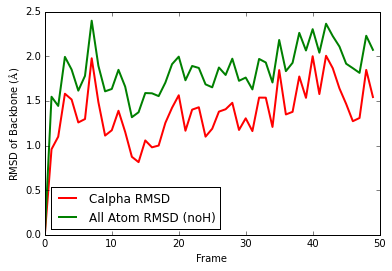

In [47]:
u = MDAnalysis.Universe('41wl_ff.psf','50_frame.dcd')
ref = MDAnalysis.Universe('41wl_ff.psf','50_frame.dcd') 
caRMSD =[]
allRMSD = []
fig,caRMSD,allRMSD = proRMSD(u,ref)
#print caRMSD
np.savetxt("SimAnaRep-caRMSD.data", caRMSD)
np.savetxt("SimAnaRep-allRMSD.data", allRMSD)
fig.figure.savefig("SimAnaRep-RMSD.pdf")